In [1]:
import itertools as it
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


You are now optimising six hyper-parameters of a machine learning model. Note that it is a popular and frequently used model, so maybe you could search to see if anyone else has optisized it before?

In [2]:
X = np.load('../initial_data/function_7/initial_inputs.npy')
Y = np.load('../initial_data/function_7/initial_outputs.npy')

## Random Search

In [3]:
next_query = np.random.uniform(size=6)
print(f"next_query: {'-'.join(['%.6f' % x for x in next_query])}")

next_query: 0.429536-0.770593-0.851108-0.099216-0.513495-0.410644


## Upper Confidence Bound

In [4]:
gpr = GaussianProcessRegressor(kernel=None)
gpr.fit(X, Y)

# use gridsearch to optimise the acquisition function
x1 = np.linspace(0, 1, 5)
x2 = np.linspace(0, 1, 5)

dim=6
X_grid = np.fromiter(it.chain(*it.product(x1, repeat=dim)), dtype=float).reshape(-1, dim)

mean, std = gpr.predict(X_grid, return_std=True)
ucb = mean + 1.96 * std

idx_max = np.argmax(ucb)
next_query = X_grid[idx_max]
print(f"next_query: {'-'.join(['%.6f' % x for x in next_query])}")

next_query: 0.000000-0.000000-0.250000-0.000000-0.250000-1.000000


## Visualising the data

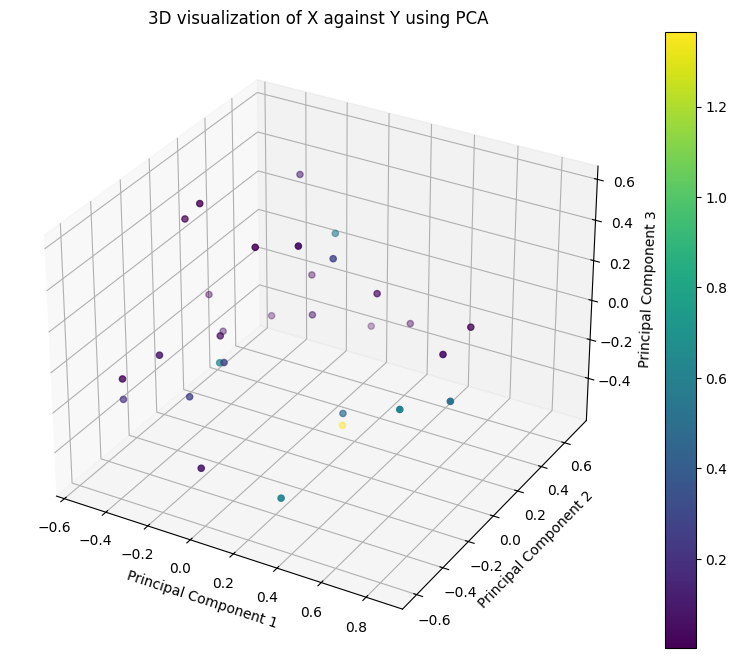

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Assume that 'X' is your 8-dimensional numpy array and 'Y' is your 1-dimensional array
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y, cmap='viridis')

# Add a colorbar
fig.colorbar(scatter)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D visualization of X against Y using PCA')
plt.show()